## DATA SPLIT
- Never take decisions based on the TEST SET
- The only thing you are allowed to check on the TEST SET is the variables' distribution
- TEST SET is independent of the TRAIN SET, but follows the same probability distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
SEED = 123

In [3]:
DATA_PATH = "../data/bank_customer_churn_prediction.csv"
data = pd.read_csv(DATA_PATH, delimiter=",")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### DATA COLUMNS

> - **customer_id:** account number
> - **credit_score:** credit score, banks use credit scores to evaluate the potential risk posed by lending money to consumers
> - **country:** country of residence
> - **gender:** sex of the account owner
> - **age:** age of the account owner
> - **tenure:** from how many years he/she has had a bank account in ABC Bank
> - **balance:** account balance
> - **products_number:** number of product from bank
> - **credit_card:** has this customer a credit card?
> - **active_member:** is he/she an active member of the bank?
> - **churn:** has he/she exited?


In [5]:
cat_variables = ["country","gender","credit_card","active_member"]
dis_variables = ["products_number","tenure","age","credit_score"]
con_variables = ["balance","estimated_salary"]
num_variables = dis_variables + con_variables

target_variable = ["churn"]

In [6]:
# Remove useless columns
data = data.drop(columns=["customer_id"])

In [7]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=SEED, shuffle=True, stratify=data[["churn"]])

### PLOT VARIABLES DISTRIBUTION

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_distribution(data_train, data_test, x, y):
    # Get unique categories and sort them
    categories = sorted(data_train[x].unique())

    # Set the order of categories in both training and testing data
    data_train[x] = data_train[x].astype('category').cat.set_categories(categories)
    data_test[x] = data_test[x].astype('category').cat.set_categories(categories)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

    # Plot for training data
    sns.histplot(data=data_train, x=x, hue=y, bins=[-0.25, 0.25, 0.75, 1.25], ax=axes[0], multiple="stack", stat="percent")
    axes[0].set_title("Training Data")
    axes[0].set_xticks(range(len(categories)))
    axes[0].set_xticklabels(categories)
    axes[0].grid(True)

    # Plot for testing data
    sns.histplot(data=data_test, x=x, hue=y, bins=[-0.25, 0.25, 0.75, 1.25], ax=axes[1], multiple="stack", stat="percent")
    axes[1].set_title("Testing Data")
    axes[1].set_xticks(range(len(categories)))
    axes[1].set_xticklabels(categories)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

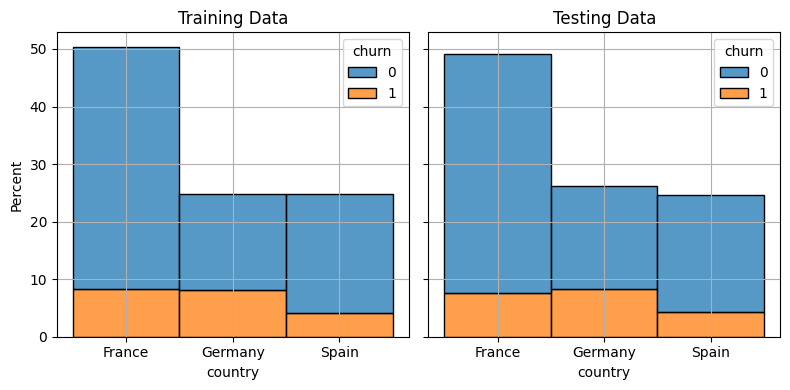

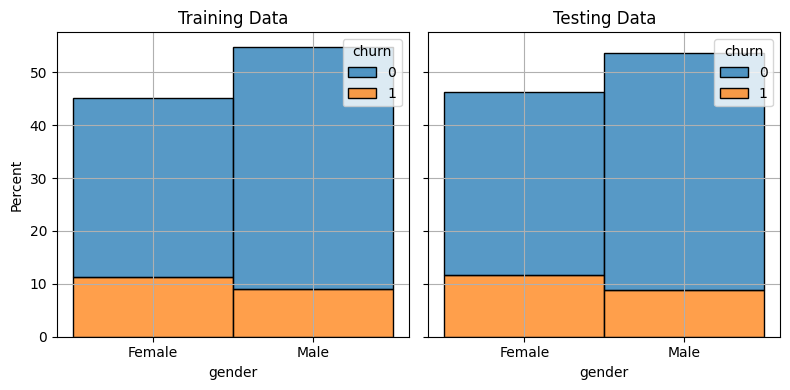

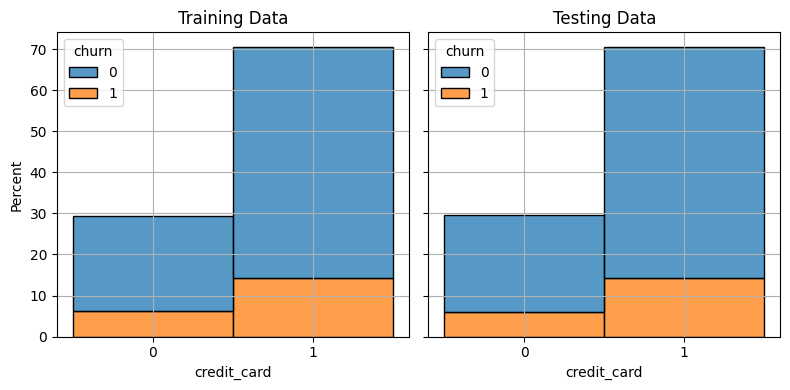

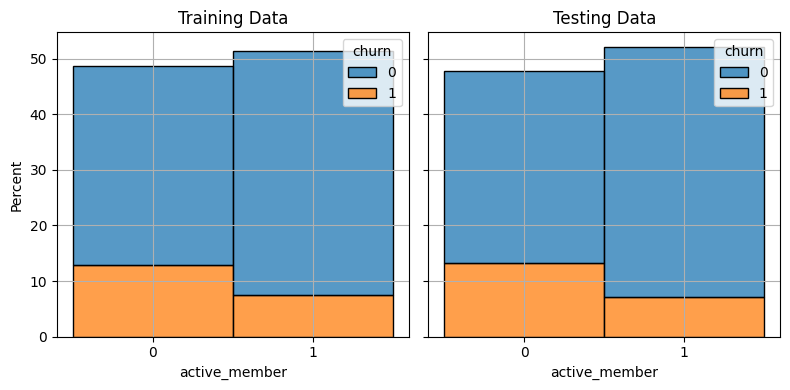

In [9]:
for clm in cat_variables:
    plot_categorical_distribution(data_train, data_test, x=clm, y="churn")

In [10]:
def plot_numerical_distribution(data_train, data_test, x, y):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

    # Plot for training data
    train_bins = np.histogram_bin_edges(data_train[x], bins="auto")
    train_plot = sns.histplot(data=data_train, x=x, hue=y, ax=axes[0], multiple="stack", stat="percent", bins=train_bins)
    axes[0].set_title("Training Data")
    axes[0].grid(True)

    # Plot for testing data with the same number of bins as training data
    test_plot = sns.histplot(data=data_test, x=x, hue=y, ax=axes[1], multiple="stack", stat="percent", bins=train_bins)
    axes[1].set_title("Testing Data")
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

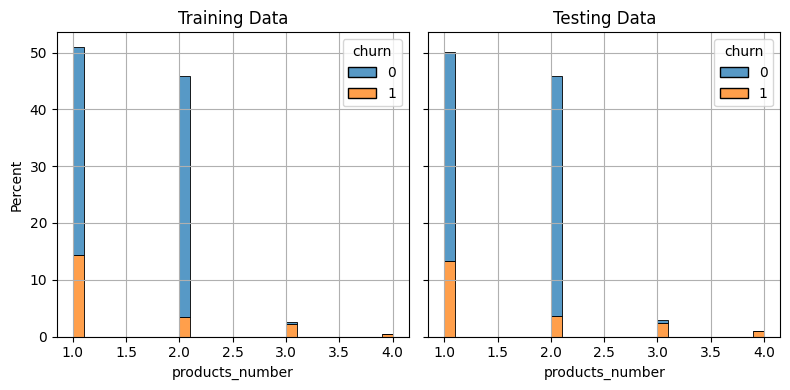

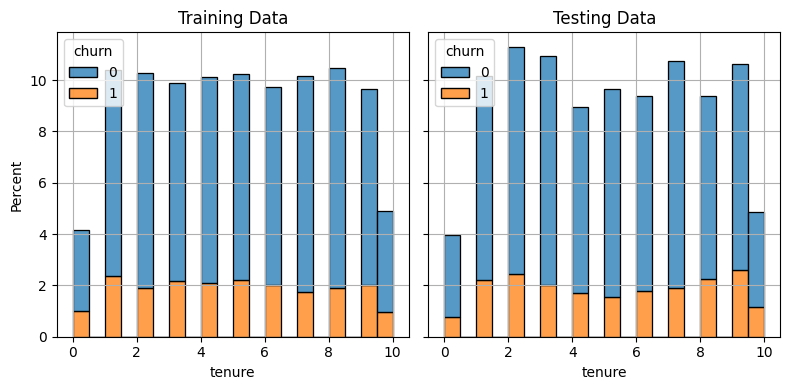

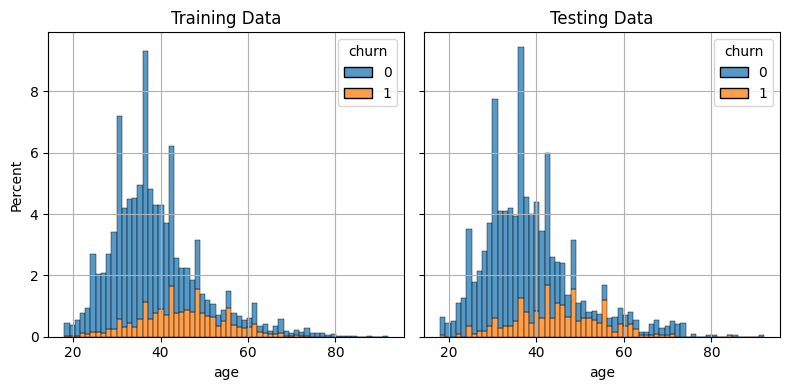

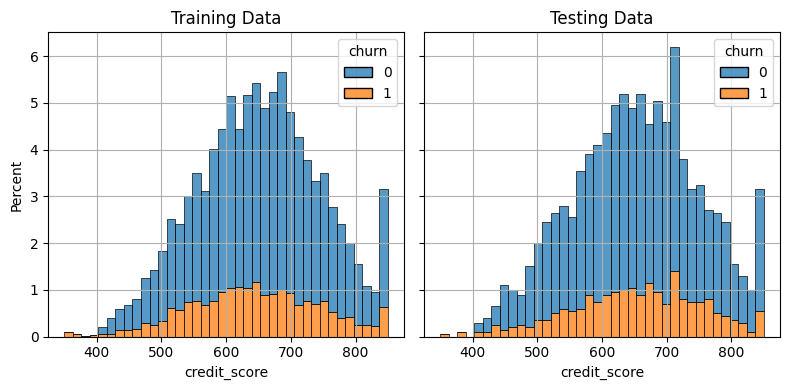

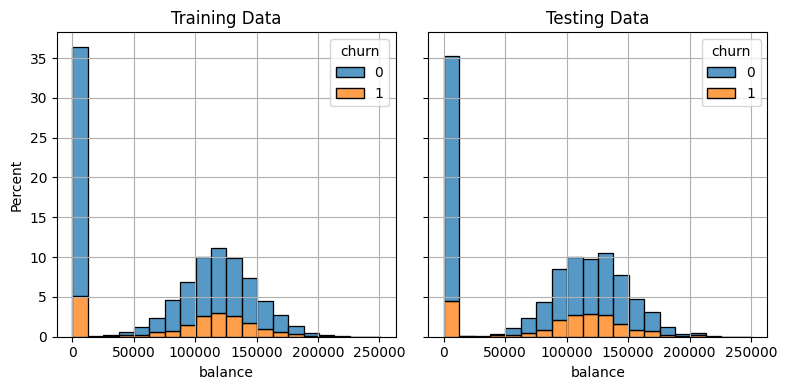

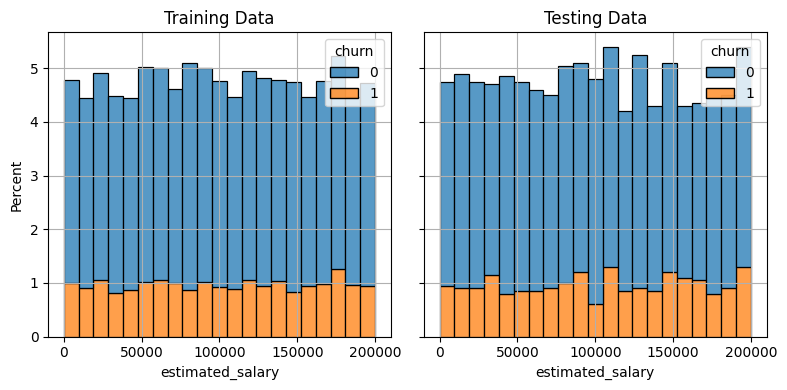

In [11]:
for clm in num_variables:
    plot_numerical_distribution(data_train, data_test, x=clm, y="churn")

### CONSLUSIONS
- > TRAIN SET and TEST SET distributions are fairly equal
- > if you want to be more formal ( *usually I do not* ) you can perform some statistical tests like:
  - > **Kolmogorov-Smirnov Test** - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

### SAVE THE SPLITS

In [12]:
DATA_TRAIN_PATH = "../data/trainset.csv"
data_train.to_csv(DATA_TRAIN_PATH, index=False)

In [13]:
DATA_TEST_PATH = "../data/testset.csv"
data_test.to_csv(DATA_TEST_PATH, index=False)